## Dataset
Kaggle Personal Key Indicators of Heart Disease (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
df.describe(include='object').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


## Data Explore

In [7]:
for col in df.dtypes[df.dtypes == 'object'].index:
    print(df[col].value_counts(normalize=True), '\n')

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64 

No     0.587523
Yes    0.412477
Name: Smoking, dtype: float64 

No     0.931903
Yes    0.068097
Name: AlcoholDrinking, dtype: float64 

No     0.96226
Yes    0.03774
Name: Stroke, dtype: float64 

No     0.86113
Yes    0.13887
Name: DiffWalking, dtype: float64 

Female    0.524727
Male      0.475273
Name: Sex, dtype: float64 

65-69          0.106790
60-64          0.105336
70-74          0.097140
55-59          0.093050
50-54          0.079370
80 or older    0.075527
45-49          0.068141
75-79          0.067174
18-24          0.065867
40-44          0.065686
35-39          0.064260
30-34          0.058641
25-29          0.053018
Name: AgeCategory, dtype: float64 

White                             0.766779
Hispanic                          0.085824
Black                             0.071730
Other                             0.034172
Asian                             0.025229
American Indian/Alaskan Native    0.016

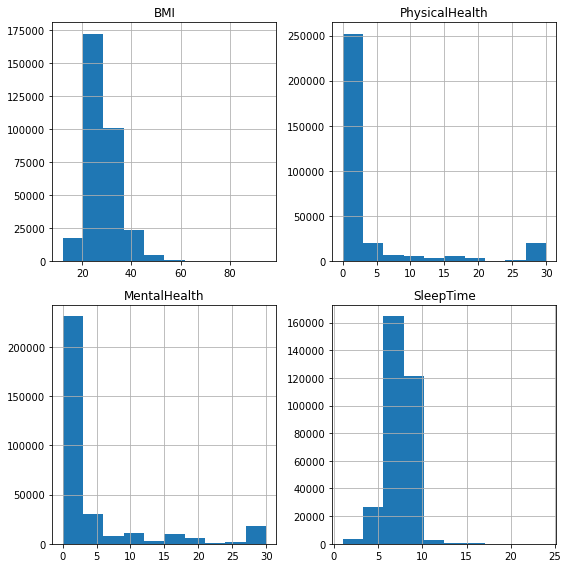

In [8]:
df.loc[:, df.dtypes != 'object'].hist(figsize=(8, 8))
plt.tight_layout()
plt.show()

## Feature Engineering

In [9]:
# resample data to solve the imbalance issue
positive_df = df[df["HeartDisease"]=="Yes"]
negative_df = df[df["HeartDisease"]=="No"]

In [10]:
positive_df = positive_df.sample(n=negative_df.shape[0], replace=True)

In [11]:
df = positive_df.append(negative_df, ignore_index=True)

In [12]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,26.61,No,No,No,0.0,0.0,No,Female,65-69,Black,No,Yes,Excellent,8.0,No,No,No
1,Yes,14.37,No,No,Yes,0.0,1.0,Yes,Female,80 or older,White,No,No,Good,8.0,No,No,No
2,Yes,28.12,Yes,No,No,0.0,0.0,Yes,Male,70-74,White,Yes,No,Fair,8.0,No,No,No
3,Yes,26.50,Yes,No,No,30.0,0.0,Yes,Male,80 or older,Black,Yes,Yes,Fair,7.0,No,No,No
4,Yes,28.59,Yes,No,No,0.0,0.0,No,Male,60-64,White,No,No,Good,9.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
584840,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
584841,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
584842,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Data Preprocessing

In [51]:
def map_age(age_category):
    age_mapper = {
        "18-24":0,
        "25-29":1,
        "30-34":2,
        "35-39":3,
        "40-44":4,
        "45-49":5,
        "50-54":6,
        "55-59":7,
        "60-64":8,
        "65-69":9,
        "70-74":10,
        "75-79":11,
        "80 or older":12
    }
    return age_mapper[age_category]

def map_race(race):
    race_mapper = {
        "American Indian/Alaskan Native": 0,
        "Asian": 1,
        "Black": 2,
        "Hispanic": 3,
        "Other": 4,
        "White": 5 
    }
    return race_mapper[race]

def map_gen_health(gen_health):
    gen_health_mapper = {
        "Excellent": 0,
        "Fair": 1,
        "Good": 2,
        "Poor": 3,
        "Very good": 4
    }
    return gen_health_mapper[gen_health]
    
def transform_data(data):
    HeartDisease = 1 if data[0] == "Yes" else 0
    BMI = data[1]
    Smoking = 1 if data[2] == "Yes" else 0
    AlcoholDrinking = 1 if data[3] == "Yes" else 0
    Stroke = 1 if data[4] == "Yes" else 0
    PhysicalHealth = data[5]
    MentalHealth = data[6]
    DiffWalking = 1 if data[7] == "Yes" else 0
    Sex = 1 if data[8] == 'Male' else 0
    AgeCategory = map_age(data[9])
    Race = map_race(data[10])
    Diabetic = 1 if data[11] == 'Yes' else 0
    PhysicalActivity = 1 if data[12] == 'Yes' else 0
    GenHealth = map_gen_health(data[13])
    SleepTime = data[14]
    Asthma = 1 if data[15] == 'Yes' else 0
    KidneyDisease = 1 if data[16] == 'Yes' else 0
    SkinCancer = 1 if data[17] == 'Yes' else 0
    return [
        HeartDisease,
        BMI,
        Smoking,
        AlcoholDrinking,
        Stroke,
        PhysicalHealth,
        MentalHealth,
        DiffWalking,
        Sex,
        AgeCategory,
        Race,
        Diabetic,
        PhysicalActivity,
        GenHealth,
        SleepTime,
        Asthma,
        KidneyDisease,
        SkinCancer
    ]

In [52]:
test1 = df.iloc[0].tolist()
test1

['Yes',
 26.61,
 'No',
 'No',
 'No',
 0.0,
 0.0,
 'No',
 'Female',
 '65-69',
 'Black',
 'No',
 'Yes',
 'Excellent',
 8.0,
 'No',
 'No',
 'No']

In [41]:
transform_data(test1)

[1, 26.61, 0, 0, 0, 0.0, 0.0, 0, 0, 9, 2, 0, 1, 0, 8.0, 0, 0, 0]

In [53]:
data = []
for lst in df.apply(transform_data, axis=1):
    data.append(lst)

In [54]:
clr_df = pd.DataFrame(data, columns=df.columns)

In [55]:
clr_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,26.61,0,0,0,0.0,0.0,0,0,9,2,0,1,0,8.0,0,0,0
1,1,14.37,0,0,1,0.0,1.0,1,0,12,5,0,0,2,8.0,0,0,0
2,1,28.12,1,0,0,0.0,0.0,1,1,10,5,1,0,1,8.0,0,0,0
3,1,26.50,1,0,0,30.0,0.0,1,1,12,2,1,1,1,7.0,0,0,0
4,1,28.59,1,0,0,0.0,0.0,0,1,8,5,0,0,2,9.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,0,22.22,0,0,0,0.0,0.0,0,0,0,3,0,1,0,8.0,0,0,0
584840,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
584841,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
584842,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


## Train Test Split

In [56]:
np.random.seed = 5
index_lst = clr_df.index.tolist()
np.random.shuffle(index_lst)
clr_df = clr_df.iloc[index_lst]

In [57]:
cutoff = int(df.shape[0]*0.7)
train_df = clr_df.iloc[:cutoff]
validation_df = clr_df.iloc[cutoff:]

In [58]:
train_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
392344,0,21.58,1,0,0,0.0,0.0,0,0,12,5,0,0,0,9.0,0,0,0
199737,1,28.80,1,0,0,2.0,10.0,0,1,11,5,0,1,2,6.0,0,0,0
553029,0,24.41,1,0,0,0.0,0.0,0,1,12,5,0,1,2,8.0,0,0,1
180133,1,37.25,1,0,0,0.0,0.0,0,1,9,5,0,0,2,8.0,0,0,0
398283,0,24.48,1,0,0,1.0,0.0,0,1,7,5,0,1,4,7.0,0,0,0


In [59]:
train_df.to_csv("train_data.csv", index=False, header=False)
validation_df.to_csv("validation_data.csv", index=False, header=False)

In [60]:
with open("train_data_column_names.txt", "w") as f:
    f.write(",".join(train_df.columns))

In [61]:
with open("all_data_column_names.txt", "w") as f:
    f.write(",".join(df.columns))

In [63]:
# Create a test dataset
test_df = validation_df.iloc[:, 1:]
test_df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
172689,34.46,1,0,0,0.0,0.0,0,1,8,5,0,1,4,8.0,0,0,1
86014,30.67,1,0,0,30.0,30.0,1,0,7,5,1,1,3,7.0,0,0,0
206025,29.76,0,0,0,0.0,0.0,0,1,10,5,0,1,2,5.0,0,0,0
290471,28.17,1,0,0,2.0,0.0,0,1,10,5,1,1,4,9.0,0,0,1
148720,25.94,0,0,0,0.0,0.0,0,1,7,5,0,1,0,7.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184698,29.29,0,0,0,5.0,0.0,0,1,9,2,0,1,2,6.0,1,0,0
323402,22.96,0,0,0,3.0,30.0,0,1,9,5,0,1,2,7.0,0,0,0
370318,36.49,0,0,0,0.0,0.0,0,1,8,5,0,1,4,7.0,0,0,0
561951,30.68,1,0,0,18.0,27.0,1,1,5,5,0,0,3,6.0,0,0,0


In [64]:
test_df.to_csv("test_data.csv", index=False, header=False)

## Test Lambda Function

In [65]:
import boto3
import math
import dateutil
import json
import os

In [67]:
ENDPOINT_NAME  = "xgboost-heart-disease-v1"
client = boto3.client(service_name="sagemaker-runtime")
target_col_name = "HeartDisease"
col_names_text = "HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer"
col_names = col_names_text.split(",")

In [68]:
def map_age(age_category):
    age_mapper = {
        "18-24":0,
        "25-29":1,
        "30-34":2,
        "35-39":3,
        "40-44":4,
        "45-49":5,
        "50-54":6,
        "55-59":7,
        "60-64":8,
        "65-69":9,
        "70-74":10,
        "75-79":11,
        "80 or older":12
    }
    return age_mapper[age_category]

def map_race(race):
    race_mapper = {
        "American Indian/Alaskan Native": 0,
        "Asian": 1,
        "Black": 2,
        "Hispanic": 3,
        "Other": 4,
        "White": 5 
    }
    return race_mapper[race]

def map_gen_health(gen_health):
    gen_health_mapper = {
        "Excellent": 0,
        "Fair": 1,
        "Good": 2,
        "Poor": 3,
        "Very good": 4
    }
    return gen_health_mapper[gen_health]
    
def inverse_map_heart_disease(heart_disease_num):
    if heart_disease_num == 1:
        return "Yes"
    else:
        return "No"

def transform_data(data):
    try:
        HeartDisease = 1 if data[0] == "Yes" else 0
        BMI = data[0]
        Smoking = 1 if data[1] == "Yes" else 0
        AlcoholDrinking = 1 if data[2] == "Yes" else 0
        Stroke = 1 if data[3] == "Yes" else 0
        PhysicalHealth = data[4]
        MentalHealth = data[5]
        DiffWalking = 1 if data[6] == "Yes" else 0
        Sex = 1 if data[7] == 'Male' else 0
        AgeCategory = map_age(data[8])
        Race = map_race(data[9])
        Diabetic = 1 if data[10] == 'Yes' else 0
        PhysicalActivity = 1 if data[11] == 'Yes' else 0
        GenHealth = map_gen_health(data[12])
        SleepTime = data[13]
        Asthma = 1 if data[14] == 'Yes' else 0
        KidneyDisease = 1 if data[15] == 'Yes' else 0
        SkinCancer = 1 if data[16] == 'Yes' else 0
        features = [
            HeartDisease,
            BMI,
            Smoking,
            AlcoholDrinking,
            Stroke,
            PhysicalHealth,
            MentalHealth,
            DiffWalking,
            Sex,
            AgeCategory,
            Race,
            Diabetic,
            PhysicalActivity,
            GenHealth,
            SleepTime,
            Asthma,
            KidneyDisease,
            SkinCancer
        ]
        return ",".join([str(f) for f in features[1:]])
                  
    except Exception as err:
        print("Error when transforming: {0}, {1}".format(data, err))
        raise Exception("Error when transforming: {0}, {1}".format(data, err))

In [69]:
def lambda_handler(event, context):
    # try:
    print("Received event: " + json.dumps(event, indent=2))
    request = json.loads(json.dumps(event))
    
    transformed_data = [transform_data(instance["features"]) for instance in request["instances"]]
    
    result = client.invoke_endpoint(EndpointName=ENDPOINT_NAME,
                                    Body=("\n".join(transformed_data).encode("utf-8")),
                                    ContentType="text/csv")
                                    
    result = result["Body"].read().decode("utf-8")
    print(result)
    # predictions = [inverse_map_heart_disease(float(r)) for r in result]
    predictions = [r for r in result]
    
    return {
        "statusCode": 200,
        "isBase64Encoded": False,
        "body": json.dumps(predictions)
    }
        
    # except Exception as err:
    #     return {
    #         "statusCode": 400,
    #         "isBase64Encoded": False,
    #         "body": "Call Failed {0}".format(err)
    #     }

In [75]:
event = {
     "instances": [
         {
             "features": [22.38, "No", "No", "No", 1.0, 3.0, "No", "Male", "35-39", "White", "No", "Yes", "Excellent", 7.0, "No", "No", "No"]
             
         },
         {
             "features": [28.42, "Yes", "No", "No", 0.0, 0.0, "No", "Female", "80 or older", "White", "Yes", "No", "Very good", 6.0, "No", "No", "Yes"]
         },
         {
             "features": [22.6, "Yes", "No", "No", 4.0, 0.0, "No", "Female", "35-39", "White", "No", "Yes", "Excellent", 8.0, "No", "No", "No"]
         }
    ]
}


In [77]:
print(json.dumps(event, indent=2))

{
  "instances": [
    {
      "features": [
        22.38,
        "No",
        "No",
        "No",
        1.0,
        3.0,
        "No",
        "Male",
        "35-39",
        "White",
        "No",
        "Yes",
        "Excellent",
        7.0,
        "No",
        "No",
        "No"
      ]
    },
    {
      "features": [
        28.42,
        "Yes",
        "No",
        "No",
        0.0,
        0.0,
        "No",
        "Female",
        "80 or older",
        "White",
        "Yes",
        "No",
        "Very good",
        6.0,
        "No",
        "No",
        "Yes"
      ]
    },
    {
      "features": [
        22.6,
        "Yes",
        "No",
        "No",
        4.0,
        0.0,
        "No",
        "Female",
        "35-39",
        "White",
        "No",
        "Yes",
        "Excellent",
        8.0,
        "No",
        "No",
        "No"
      ]
    }
  ]
}


In [82]:
request = json.loads(json.dumps(event))

In [83]:
transformed_data = [transform_data(instance["features"]) for instance in request["instances"]]

In [84]:
transformed_data

['22.38,0,0,0,1.0,3.0,0,1,3,5,0,1,0,7.0,0,0,0',
 '28.42,1,0,0,0.0,0.0,0,0,12,5,1,0,4,6.0,0,0,1',
 '22.6,1,0,0,4.0,0.0,0,0,3,5,0,1,0,8.0,0,0,0']

In [85]:
result = client.invoke_endpoint(EndpointName=ENDPOINT_NAME,
                                Body=("\n".join(transformed_data).encode("utf-8")),
                                ContentType="text/csv")

In [86]:
result

{'ResponseMetadata': {'RequestId': 'b7343d70-a978-4b8b-8f24-ca27fbfb1993',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'b7343d70-a978-4b8b-8f24-ca27fbfb1993',
   'x-amzn-invoked-production-variant': 'AllTraffic',
   'date': 'Sun, 03 Apr 2022 20:51:29 GMT',
   'content-type': 'text/csv; charset=utf-8',
   'content-length': '11'},
  'RetryAttempts': 0},
 'ContentType': 'text/csv; charset=utf-8',
 'InvokedProductionVariant': 'AllTraffic',
 'Body': <botocore.response.StreamingBody at 0x7f90390e85f8>}

In [87]:
result = result["Body"].read().decode("utf-8")

In [88]:
result

'0.0,1.0,0.0'

In [93]:
predictions = [float(r) for r in result.split(",")]

In [94]:
predictions

[0.0, 1.0, 0.0]

In [95]:
json.dumps(predictions)

'[0.0, 1.0, 0.0]'